# CÁLCULO
# FUNCIONES Y SUS LÍMITES

## EL LÍMITE DE UNA FUNCIÓN

    El propósito de este sección es explorar el significado del límite de una función. Comenzaremos mostrando como la idea de un límite surge cuando tratamos de en contrar la velocidad de un objeto en caída. 

#### Ejemplo

Suponga que una pelota es soltada de la parte superior de una torre, de 450 metros de alto. Encontrar la velocidad de la pelota despues de cinco segundos.

Vamos a simular la posición de la pelota en intervalos de 1 segundo

In [13]:
h0 = 450
v0 = 0
g = 9.81
 
h(t) = h0 + v0*t - (1/2)*g*t^2

show(h)

t |--> -4.90500000000000*t^2 + 450

In [11]:
import numpy as np
tiempos = np.linspace(0,5,num=101,endpoint=True)
print(tiempos)

[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.    1.05  1.1   1.15
  1.2   1.25  1.3   1.35  1.4   1.45  1.5   1.55  1.6   1.65  1.7   1.75
  1.8   1.85  1.9   1.95  2.    2.05  2.1   2.15  2.2   2.25  2.3   2.35
  2.4   2.45  2.5   2.55  2.6   2.65  2.7   2.75  2.8   2.85  2.9   2.95
  3.    3.05  3.1   3.15  3.2   3.25  3.3   3.35  3.4   3.45  3.5   3.55
  3.6   3.65  3.7   3.75  3.8   3.85  3.9   3.95  4.    4.05  4.1   4.15
  4.2   4.25  4.3   4.35  4.4   4.45  4.5   4.55  4.6   4.65  4.7   4.75
  4.8   4.85  4.9   4.95  5.  ]


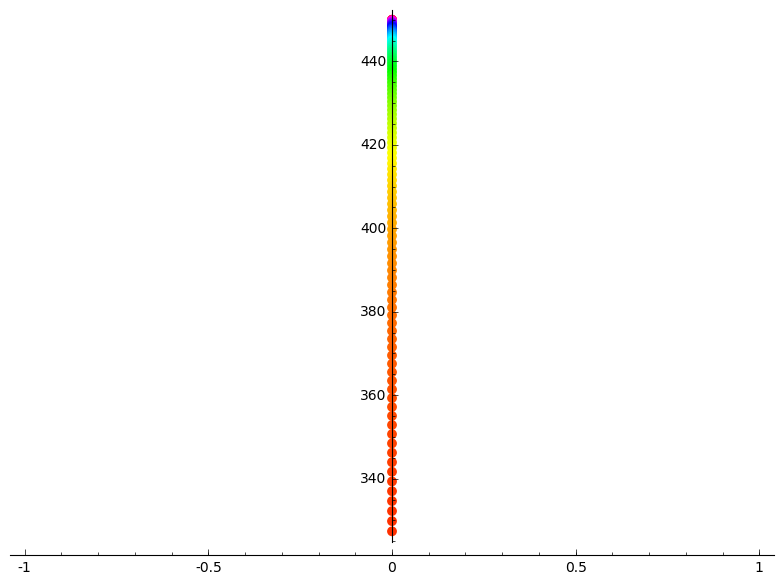

In [14]:
simulacion = Graphics()

for t0 in tiempos:
    simulacion += point((0, h(t0)), color=hue(2^-t0), size=50 )

show(simulacion)

Lo primero que se nos podría ocurrir es calcular la velocidad promedio

In [7]:
h(5)

327.375000000000

In [20]:
ti = 4.999999
tf = 5

velocidad_promedio = (h(tf)-h(ti))/(tf-ti)
print(velocidad_promedio)

-49.0499950774043


Sin embargo, es importante notar que si elegimos intervarlos cada vez más pequeño para calcular esta velocidad promedio, obtendremos resultados diferentes.

In [ ]:
import numpy as np

g=9.81
h(t) = 450 -(1/2)*g*t^2

tiempos = np.linspace(4.9999,5,11,endpoint=True)

for t0 in tiempos:
    try:
        velocidad_promedio = (h(5)-h(t0))/(5-t0)
        print(t0, velocidad_promedio)
    except:
        print(t0, "Division entre 0")

¿Qué sucede si intentamos repetir el procedimiento, pero ahora sólo en el intervalo $[4,5]$?

In [ ]:
tiempos = np.linspace(4,5,num=11,endpoint=True)

for t0 in tiempos:
    try:
        velocidad_promedio = (h(5)-h(t0))/(5-t0)
        print(t0, velocidad_promedio)
    except:
        print(t0, "Division entre 0")

Ahora, repitamos esto mismo, pero en el intervalo $[4.9, 5]$

In [ ]:
tiempos = np.linspace(4.9,5,num=11,endpoint=True)

for t0 in tiempos:
    try:
        velocidad_promedio = (h(5)-h(t0))/(5-t0)
        print(t0, velocidad_promedio)
    except:
        print(t0, "Division entre 0")

Podemos conjeturar que la velocidad promedio en intervalos cada vez más cortos, se aproxima a `-49m/s`. Repitamos una última vez este procedimiento.

In [ ]:
tiempos = np.linspace(4.99,5,num=11,endpoint=True)

for t0 in tiempos:
    try:
        velocidad_promedio = (h(5)-h(t0))/(5-t0)
        print(t0, velocidad_promedio)
    except:
        print(t0, "Division entre 0")

Sin embargo, ¡cuánto más nos acercamos a `t=5.0`, no empezamos a alejar un poco más de `v=-49`! De hecho, **la respuesta correcta es `v=-49.05`.** Esto nos muestra que los cálculos numérico por si mismos, no siempre nos tan precisos como creyeramos. Por eso, nos es necesario realizar un análisis matemático cauteloso de este tipo de fenómenos físicos.

De hecho, lo que estamos tratando de cálcular es el límite de la velocidad promedio cuando el cambio en el tiempo es aproximadamente cero. Al valor que obtenemos se le llama *velocidad instantanea*.

Antes de entrar en la parte teórica, calculemos este límite con `Sagemath`:

In [ ]:
velocidad_promedio(t) = (h(5)-h(t))/(5-t)

velocidad_instantanea = limit(velocidad_promedio(t), t=5)

print(velocidad_instantanea)

In [ ]:
show(velocidad_promedio(t).full_simplify())

No es díficil entender porque la respuesta es esta. Observemos primero la gráfica de la velocidad promedio:

In [ ]:
plot(velocidad_promedio)

En efecto, ¡su gráfica es una recta! Incluso podemos obtener su expresión algebraica:

In [ ]:
show(velocidad_promedio)

La cual se simplifica 

In [ ]:
show(velocidad_promedio.factor())

El detalle es que si intentamos evaluar en `t=5` en la expresión original, obtendremos una horrible división entre de cero. Ahora, si simplificamos la expresión, no es díficil evaluar en este punto, **¡pero la única manera de simplificar es removiendo dicho punto!** De aquí surgió la idea de los límites. 

### Definición intuitiva de límite.

#### Ejercicio
* Cálcule numericamente el límite de la función $f(x)=x^2-x+2$, cuando $x$ se aproxima a `2` (lo cual escribiremos como $x\to 2$), tal como lo hicimos en el ejercicio anterior. 
* En el ejercicio anterior sólo lo aproximamos usando valores de `x` menores al punto límite. Ahora intente calcularlo, usando valores mayores que `x=2`.

In [ ]:
f(x) = x^2-x+2

izquierda = np.linspace(1.9,2,num=11)

for x0 in izquierda:
    print(x0, f(x0))
    
    
derecha = np.linspace(2.1,2,num=11)

for x0 in derecha:
    print(x0, f(x0))

In [ ]:
f(x) = sin(x)/x
plot(f)

In [ ]:
izquierda = np.linspace(-1,0,num=11, endpoint=False)

for x0 in izquierda:
    print(x0, f(x0))
    
    
derecha = np.linspace(1,0,num=11, endpoint=False)

for x0 in derecha:
    print(x0, f(x0))

#### Definición (intuitiva)
Suponga que $f(x)$ está definida cuando $x$ está cercano a un número $c$. Entonces decimos que el límite de $f(x)$ cuando $x$ se aproxima a $c$ es igual a $L$ si podemos hacer que los valores de $f(x)$ sean *arbitrariamente* cercanos a $L$ tomando valores de $x$ suficientemente cercanos (pero no iguales) a $c$. 

En este caso escribimos
$$ L = \lim_{x\to c} f(x) $$

#### Ejercicio
* Intente encontrar numéricamente 
$$ \lim_{x \to 1} \dfrac{x-1}{x^2-1} $$.
* ¿Es posible cálcularlos sólo sustituyendo en $x=1$?

#### Ejercicio
* Intente encontrar numéricamente 
$$ \lim_{t \to 0} \dfrac{\sqrt{t^2+9} - 3}{t^2} $$.
* ¿Es posible cálcularlos sólo sustituyendo en $t=0$?

#### Ejercicio
* Intente encontrar numéricamente 
$$ \lim_{x \to 0} \dfrac{\sin(x)}{x} $$.
* ¿Es posible cálcularlos sólo sustituyendo en $x=0$?

#### Ejercicio
* Investigue 
$$ \lim_{x\to 0} \sin\left(\dfrac{\pi}{x}\right) $$
* Trace la gráfica de esta función

### Límites unilaterales

#### Ejemplo

En la física matemática, es posible encontrar funciones definidas a trozo que no son *continuas*. Por ejemplo, la función de *Heaviside*:

$$
H(t)=
\begin{cases}
0 & t<0 \\
1 & t\geq 0
\end{cases}
$$

In [ ]:
negativos = (-infinity, 0)
cero = [0,0]
positivos = (0, infinity)

definicion_a_trozos = [
    [negativos,0], 
    [cero,1], 
    [positivos,1] ]

H(x) = piecewise(definicion_a_trozos)
print(H(0))

plot(H, (t,-1,1), thickness=5)

Si calculamos el límite cuando $t\to 0$ por la izquierda, obtenemos el límite $L=0$

In [ ]:
negativos = np.linspace(-1,0,num=10)
for x in negativos:
    print(x, H(x))

Si calculamos el límite cuando $t\to 0$ por la derecha, obtenemos el límite $L=1$

In [ ]:
positivos = np.linspace(1,0,num=10)
for x in positivos:
    print(x, H(x))

Sin embargo, hay un salto o *discontinuidad*, ya que los valores de $H$ a la izquierda de $t=0$ son exactamente 0, pero en $t=0$, $H$ es igual a uno:

In [ ]:
print(H(0))

Para diferenciar el valor del límite calculado a partir de la aproximación por lados diferentes, utilizamos la siguiente notación:
* $x \to c^-$ si la aproximación es desde $-\infty$, es decir, por la izquierda 
* $x \to c^+$ si la aproximación es desde $+\infty$, es decir, por la derecha 

Entonces, escribiremos 
$$\lim_{x\to c^-} f(x)$$ para el límite (lateral) que obtenemos por la izquierda y
$$\lim_{x\to c^+} f(x)$$ para el límite (lateral) que obtenemos por la derecha.

En el ejemplo de la función de Heaviside, tendríamos que 
$$\lim_{x\to c^-} H(x) = 0$$
$$\lim_{x\to c^-} H(x) = 1$$ 

Observe que el límite bilateral sólo puede definirse si existen los límites laterales y estos coinciden. Resumiendo tenemos que

#### Proposición
$$\lim_{x\to c} f(x) = L$$ si y solo si
$$\lim_{x\to c^-} f(x)=\lim_{x\to c^+} f(x)$$

Antes de continuar con los cálculos numéricos, procedamos a realizar un ejercicio de comprensión

#### Ejercicio
![IM10103:Discontinuidades](IM10103.PNG)

Calcule los siguientes límites:

* $$\lim_{x\to 2^-} g(x)$$ 
* $$\lim_{x\to 2^+} g(x)$$ 
* $$\lim_{x\to 2} g(x)$$

* $$\lim_{x\to 5^-} g(x)$$ 
* $$\lim_{x\to 5^+} g(x)$$ 
* $$\lim_{x\to 5} g(x)$$

#### Ejercicio
Determine si 
$$ \lim_{x\to 0} \dfrac{1}{x^2} $$
existe.